In [343]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [345]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


In [346]:
print(df.dtypes) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [347]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


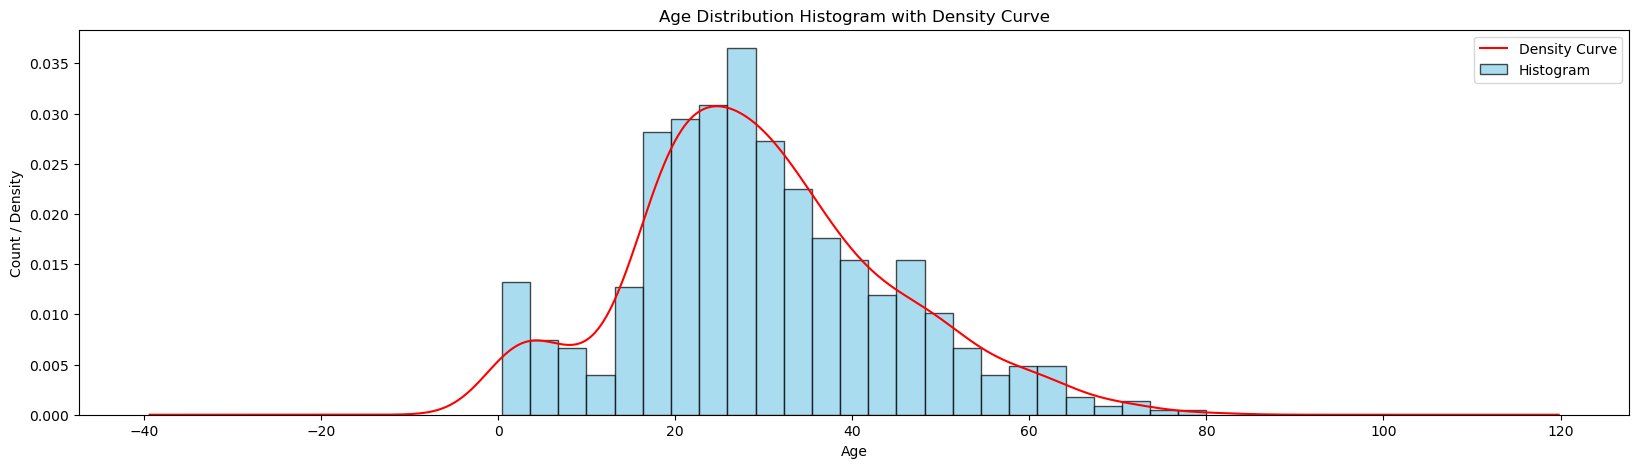

In [348]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

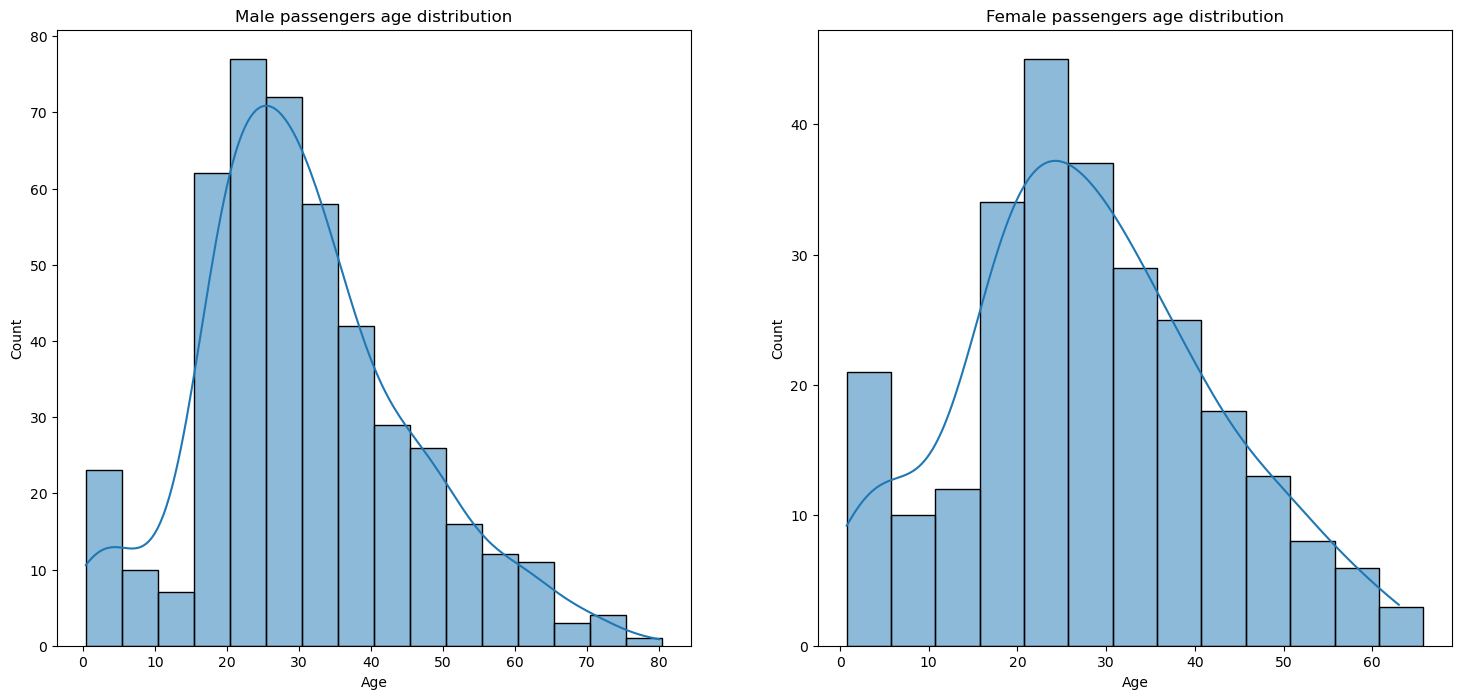

In [349]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(data=df[df['Sex'] == 'male'], x="Age", kde=True, palette = "Set2",binwidth=5,ax=ax[0])
ax[0].set_title('Male passengers age distribution')
sns.histplot(data=df[df['Sex'] == 'female'], x="Age", kde=True, palette = "Set2",binwidth=5,ax=ax[1])
ax[1].set_title('Female passengers age distribution')
plt.show()

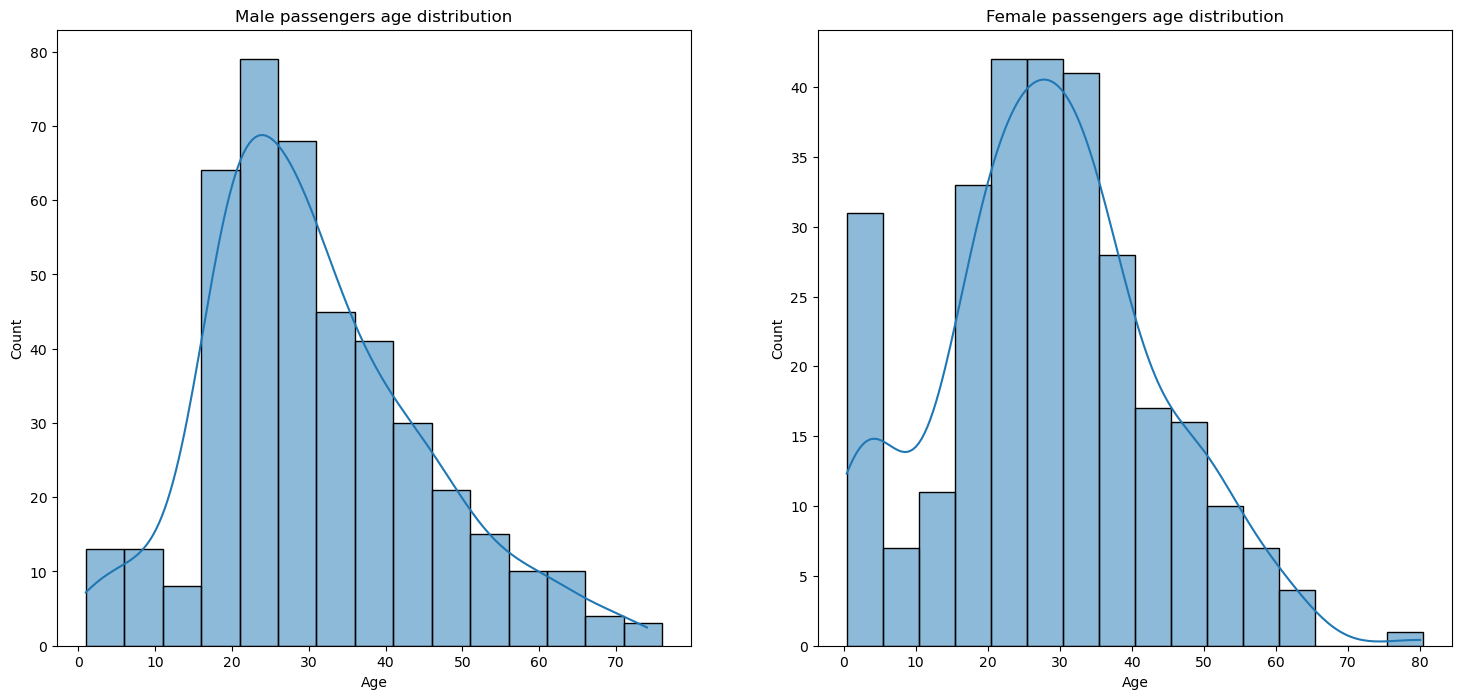

In [350]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(data=df[df['Survived'] == 0], x="Age", kde=True, palette = "Set2",bins=20,binwidth=5,ax=ax[0])
ax[0].set_title('Male passengers age distribution')
sns.histplot(data=df[df['Survived'] == 1], x="Age", kde=True, palette = "Set2",bins=20,binwidth=5,ax=ax[1])
ax[1].set_title('Female passengers age distribution')
plt.show()

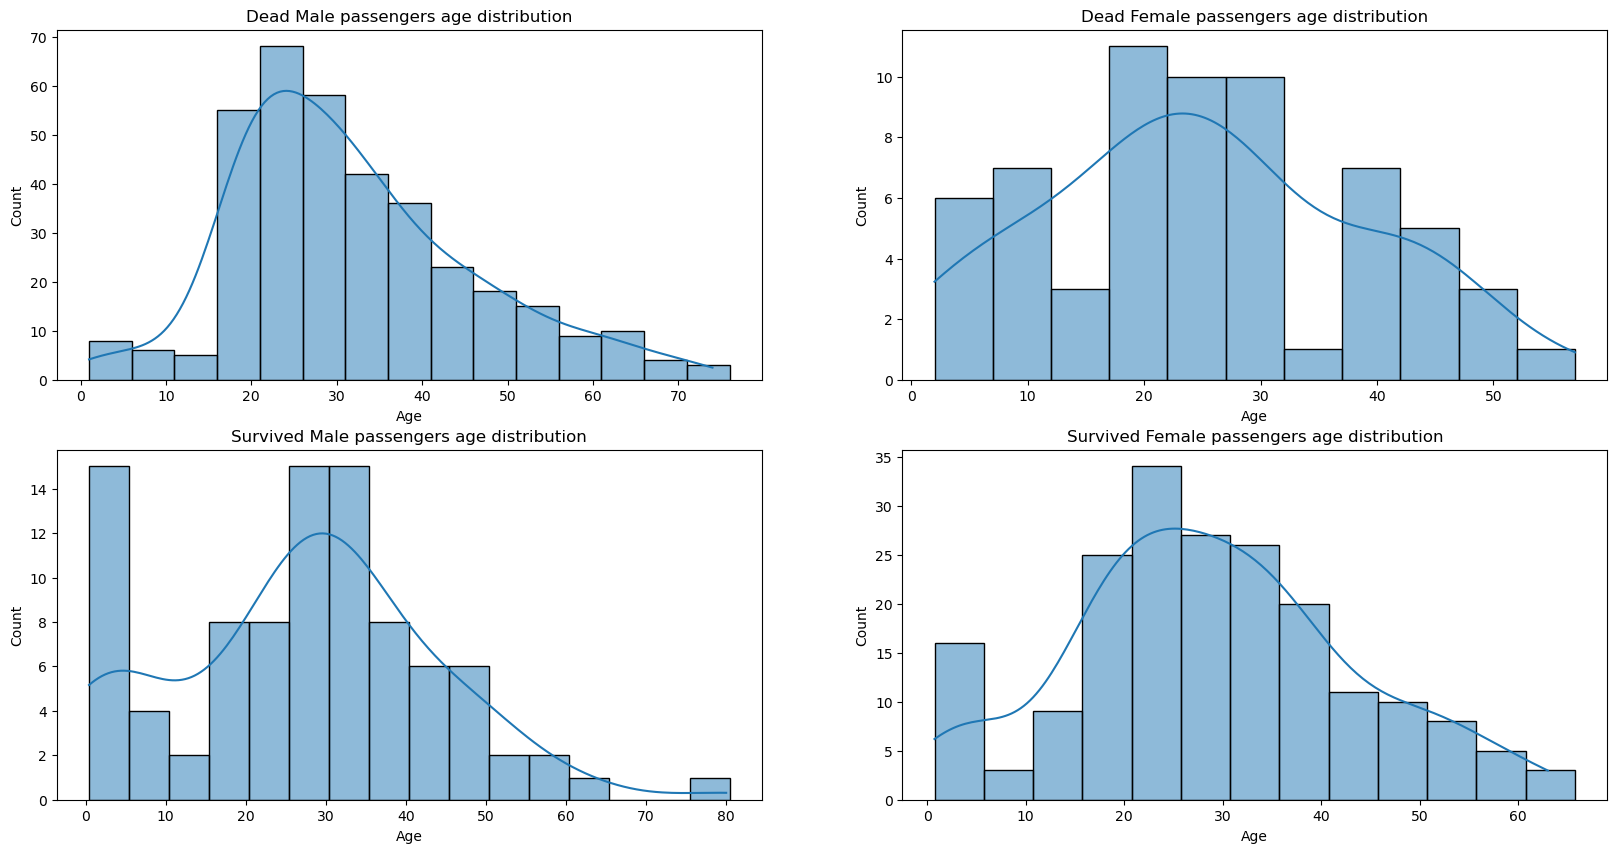

In [351]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(data=df[(df['Sex'] == 'male') & (df['Survived'] == 0)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[0, 0])
ax[0, 0].set_title('Dead Male passengers age distribution')
sns.histplot(data=df[(df['Sex'] == 'female') & (df['Survived'] == 0)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[0, 1])
ax[0, 1].set_title('Dead Female passengers age distribution')
sns.histplot(data=df[(df['Sex'] == 'male') & (df['Survived'] == 1)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[1, 0])
ax[1, 0].set_title('Survived Male passengers age distribution')
sns.histplot(data=df[(df['Sex'] == 'female') & (df['Survived'] == 1)], x="Age", kde=True, palette="Set2",bins=20,binwidth=5, ax=ax[1, 1])
ax[1, 1].set_title('Survived Female passengers age distribution')
plt.show()

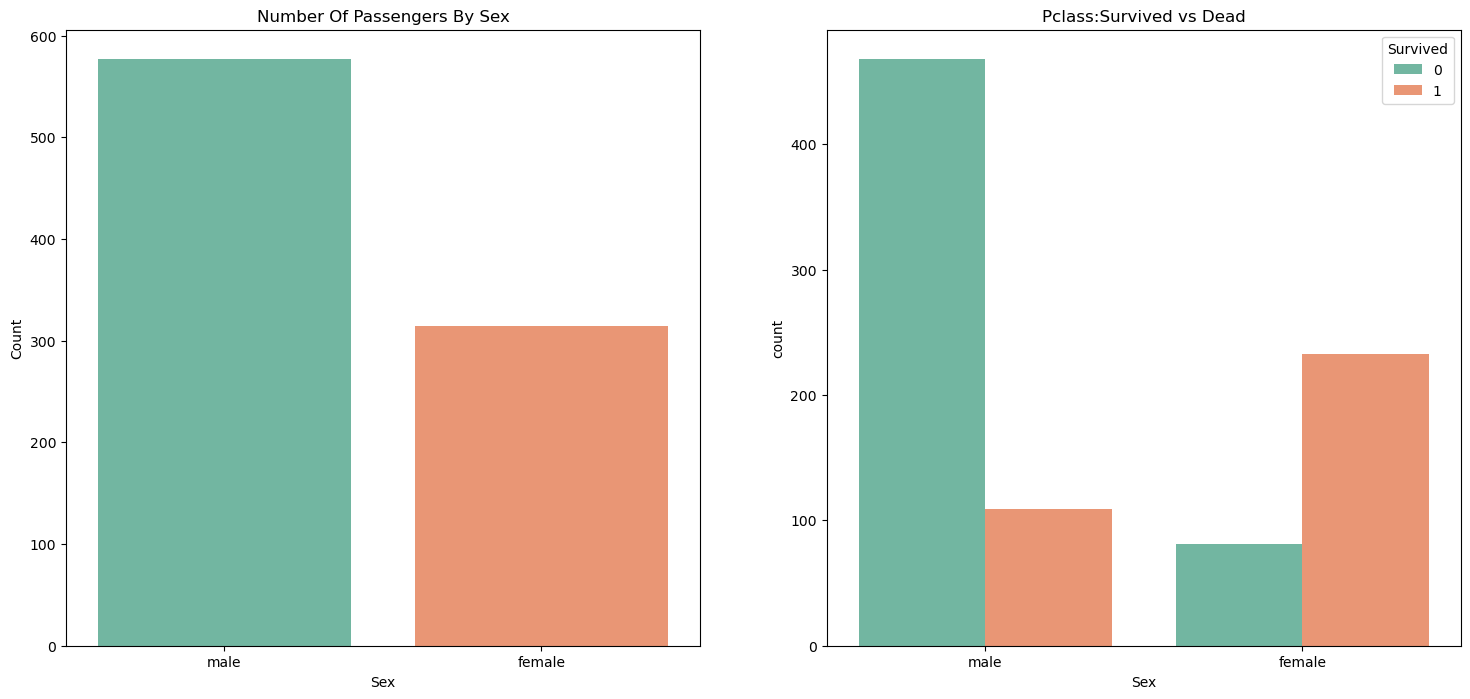

In [352]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Sex',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('Count')
sns.countplot('Sex',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

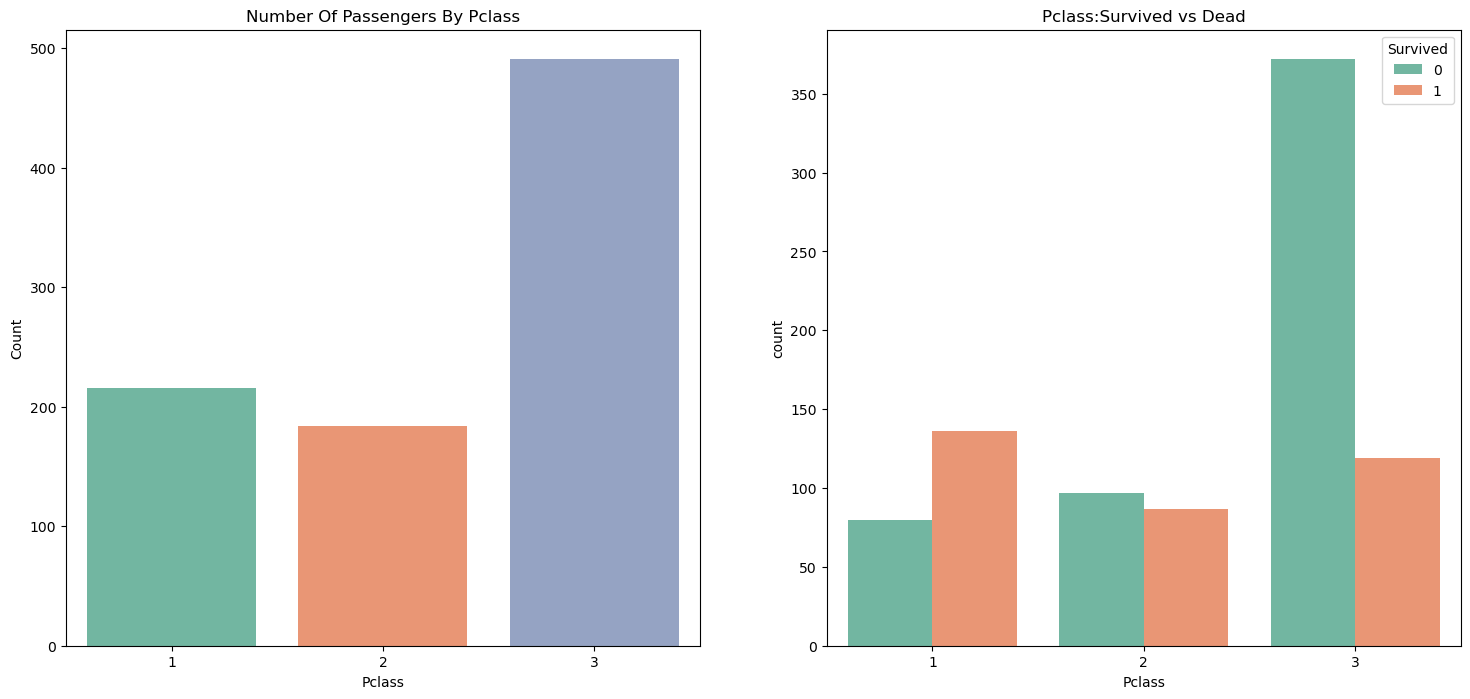

In [353]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Pclass',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

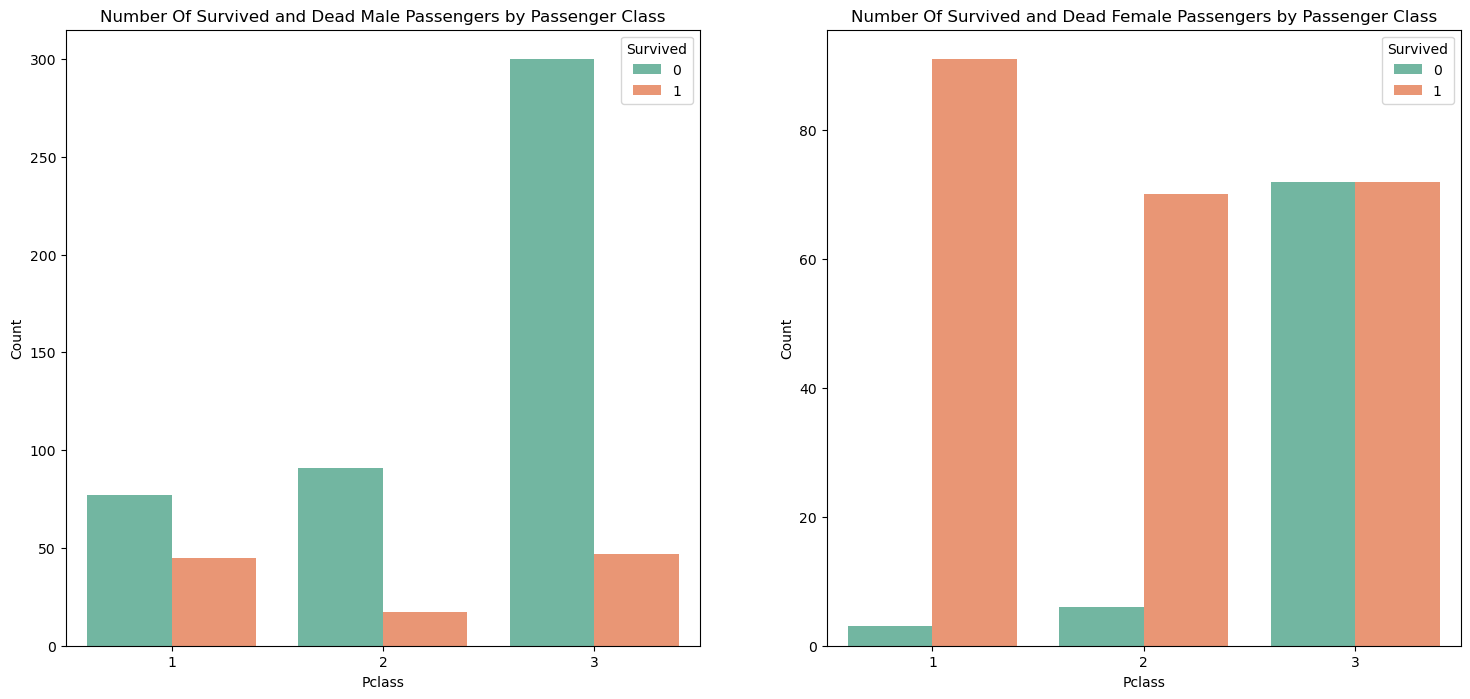

In [354]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Pclass',hue='Survived',data=df[df['Sex'] == 'male'], palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Survived and Dead Male Passengers by Passenger Class')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[1])
ax[1].set_title('Number Of Survived and Dead Female Passengers by Passenger Class')
ax[1].set_ylabel('Count')
plt.show()

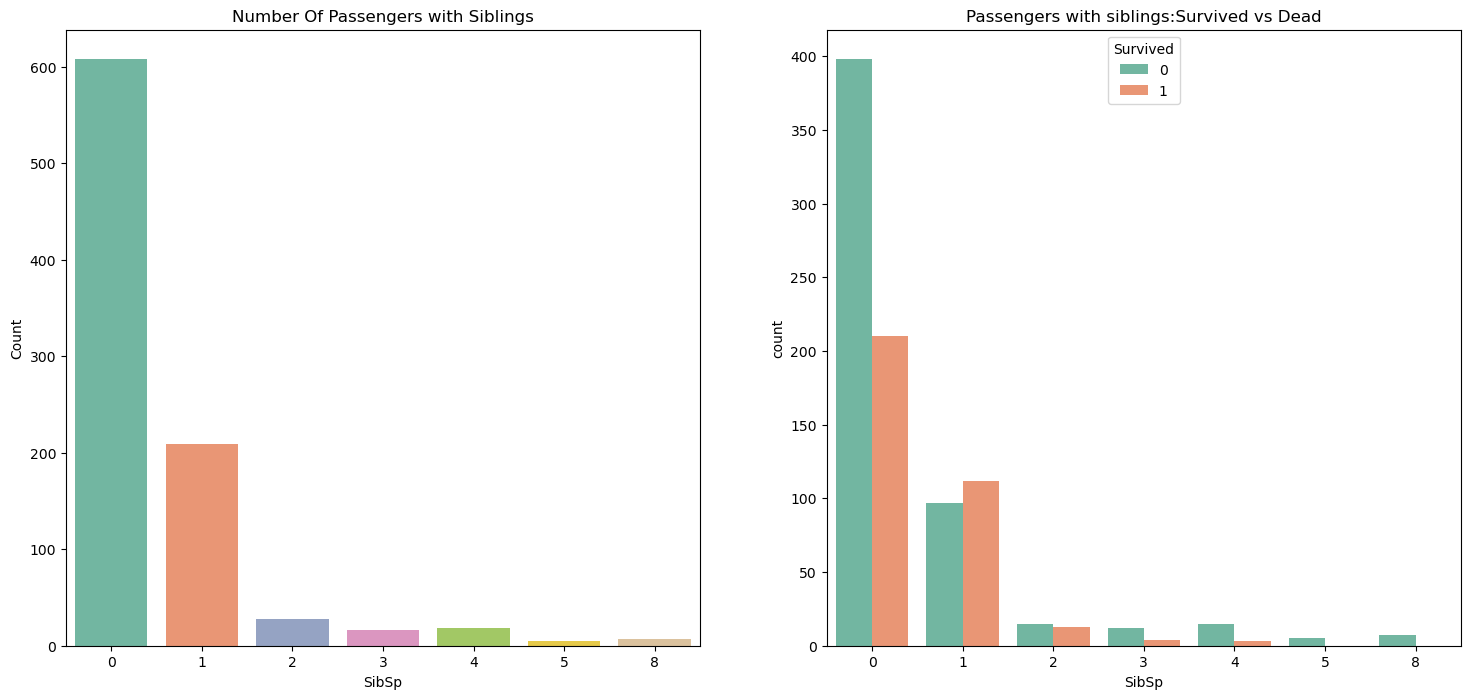

In [355]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('SibSp',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Passengers with Siblings')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Passengers with siblings:Survived vs Dead')
plt.show()

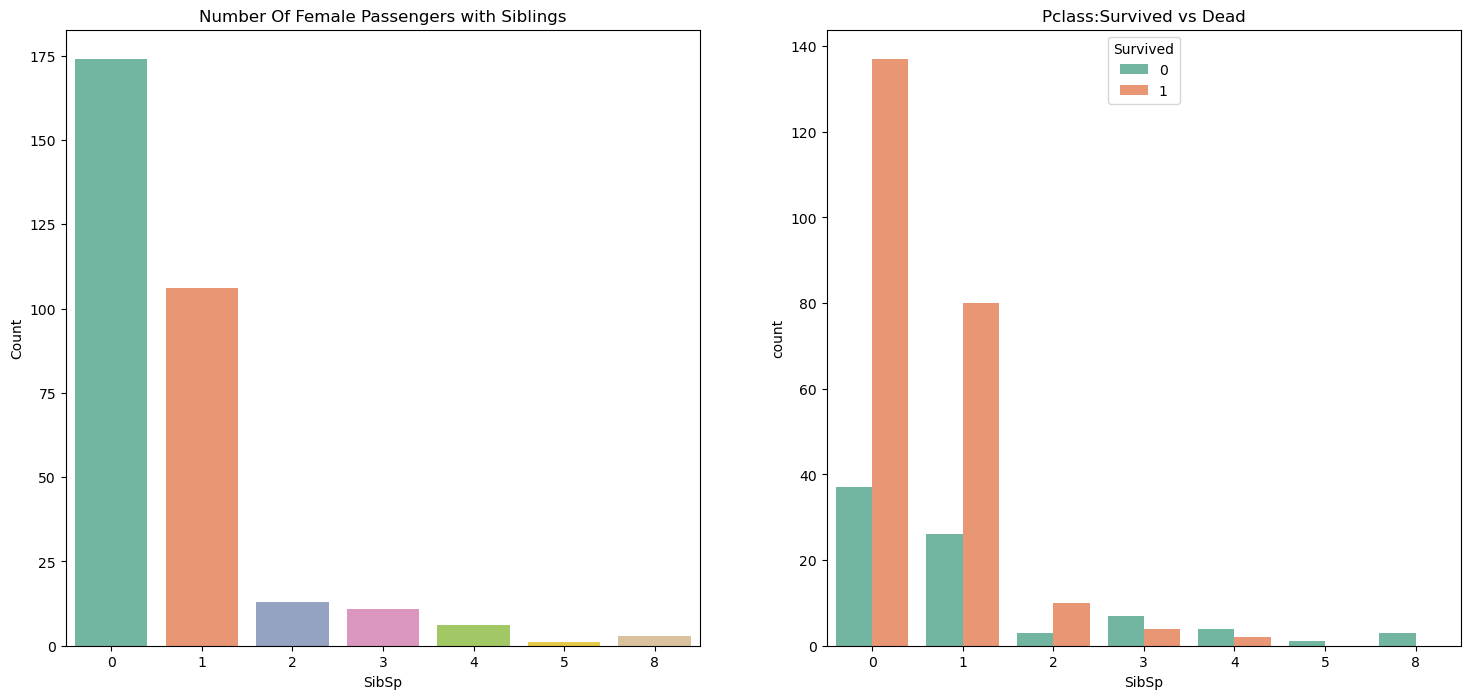

In [356]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('SibSp',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Female Passengers with Siblings')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

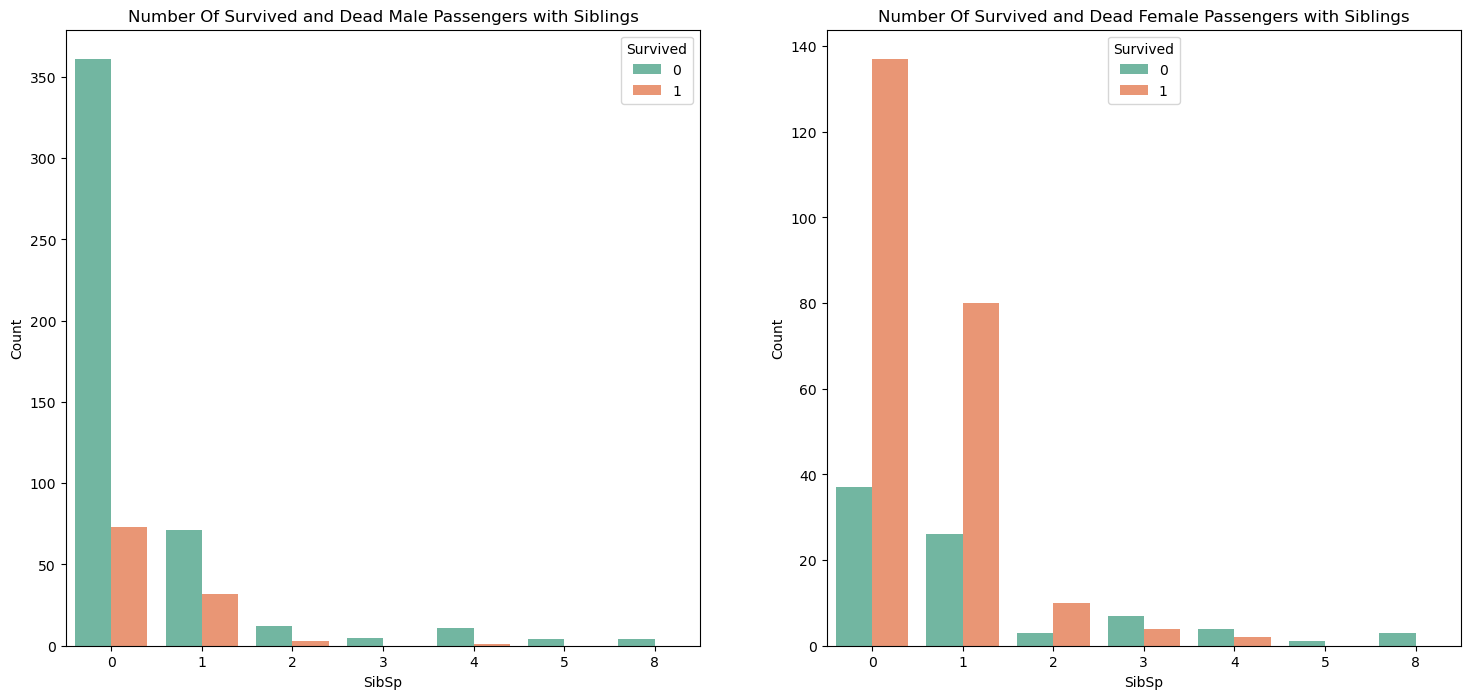

In [357]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('SibSp',hue='Survived',data=df[df['Sex'] == 'male'], palette = "Set2",ax=ax[0])
ax[0].set_title('Number Of Survived and Dead Male Passengers with Siblings')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=df[df['Sex'] == 'female'], palette = "Set2",ax=ax[1])
ax[1].set_title('Number Of Survived and Dead Female Passengers with Siblings')
ax[1].set_ylabel('Count')
plt.show()

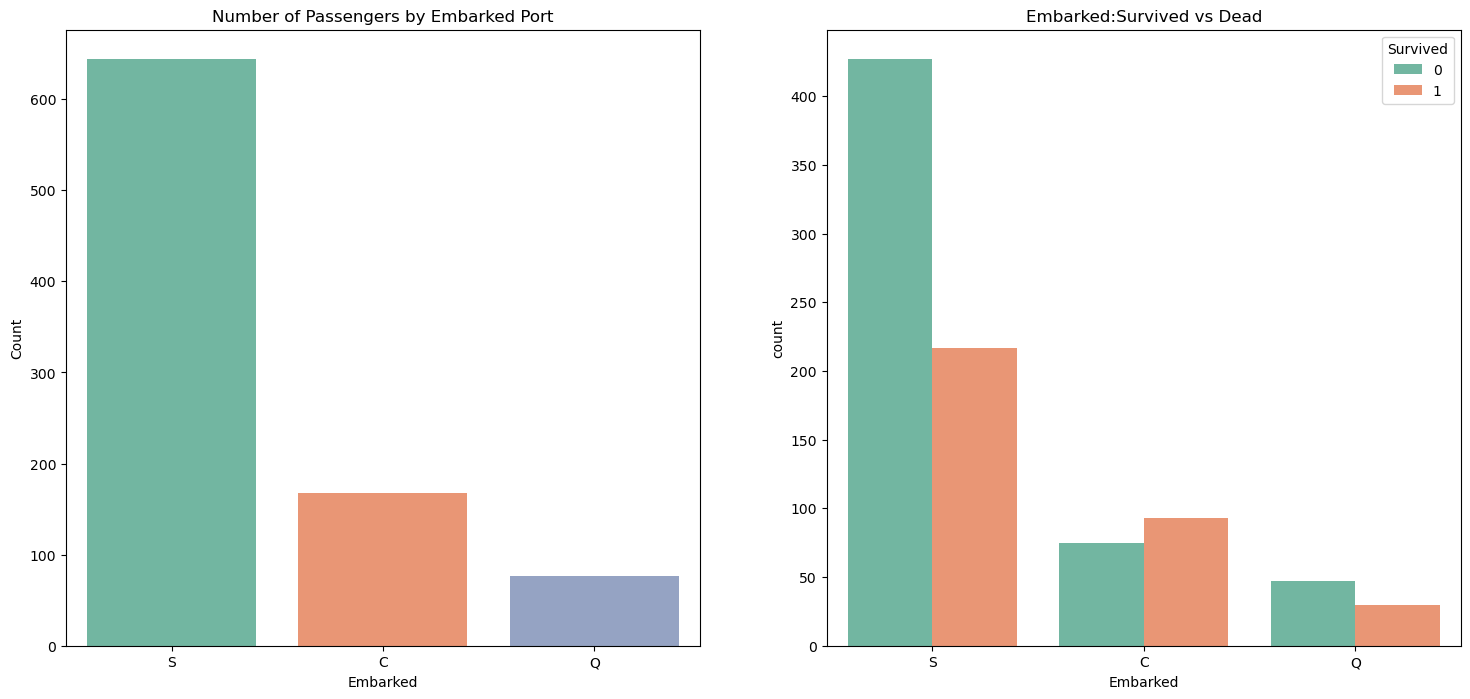

In [358]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Embarked',data=df, palette = "Set2",ax=ax[0])
ax[0].set_title('Number of Passengers by Embarked Port')
ax[0].set_ylabel('Count')
sns.countplot('Embarked',hue='Survived',data=df, palette = "Set2",ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
ax[0].set_ylabel('Count')
plt.show()

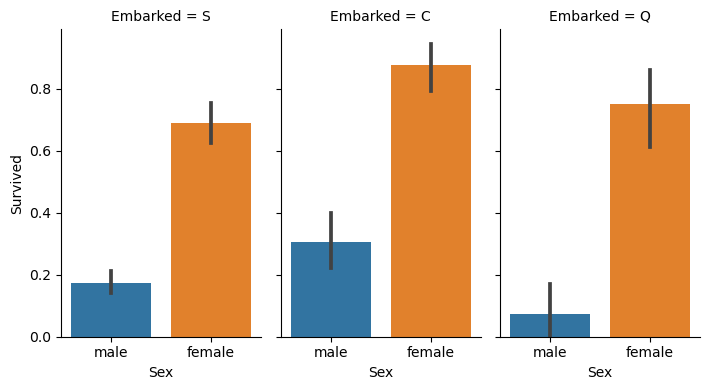

In [359]:
sns.catplot(data=df, x="Sex", y="Survived", col="Embarked", kind="bar", height=4, aspect=.6)

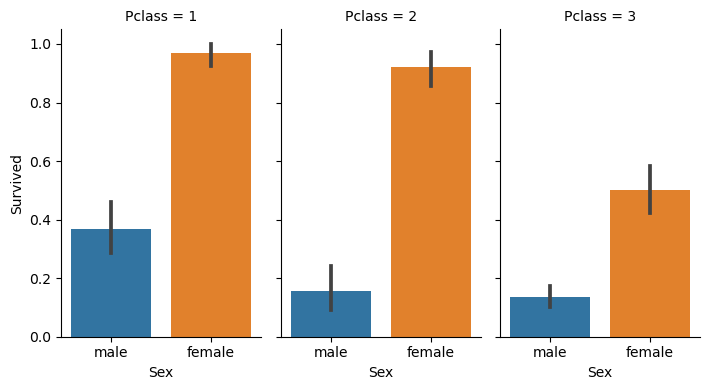

In [360]:
sns.catplot(data=df, x="Sex", y="Survived", col="Pclass", kind="bar", height=4, aspect=.6, ax=ax[0])

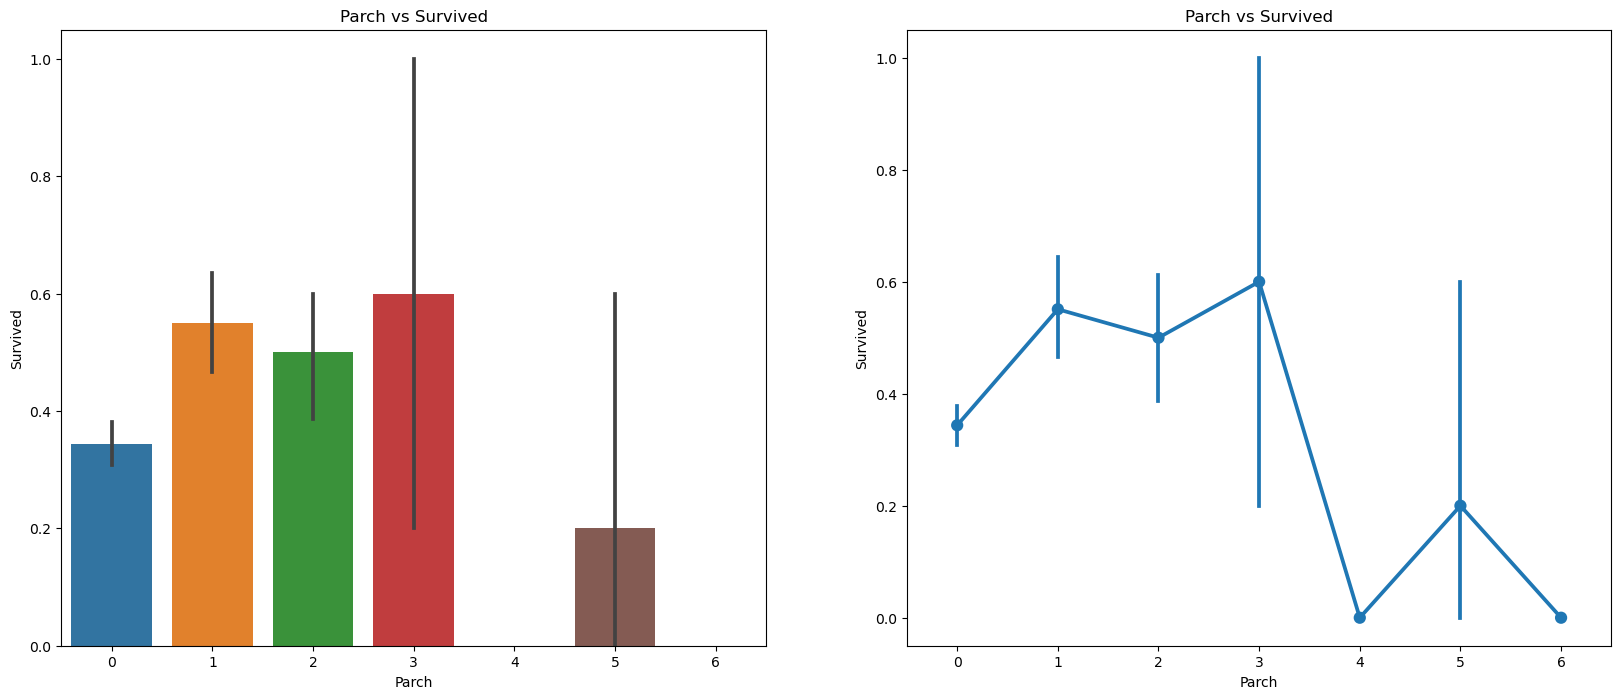

In [361]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=df,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(data=df, x="Parch", y="Survived",ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

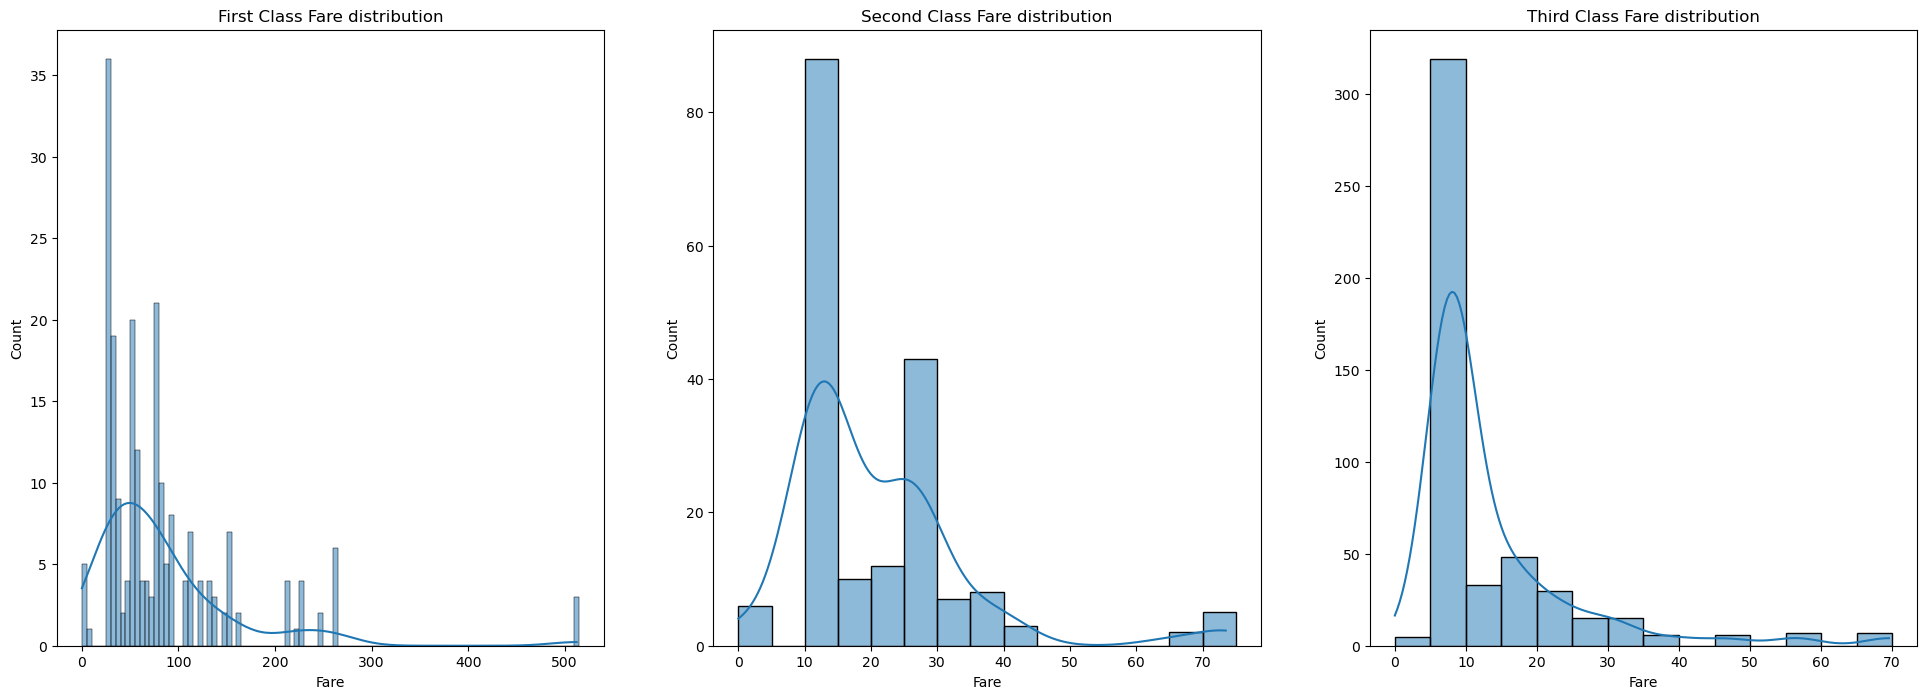

In [362]:
f,ax=plt.subplots(1,3,figsize=(24,8))
sns.histplot(data=df[df['Pclass'] == 1], x="Fare", kde=True, palette = "Set2",binwidth=5,ax=ax[0])
ax[0].set_title('First Class Fare distribution')
sns.histplot(data=df[df['Pclass'] == 2], x="Fare", kde=True, palette = "Set2",binwidth=5,ax=ax[1])
ax[1].set_title('Second Class Fare distribution')
sns.histplot(data=df[df['Pclass'] == 3], x="Fare", kde=True, palette = "Set2",binwidth=5,ax=ax[2])
ax[2].set_title('Third Class Fare distribution')
plt.show()

In [363]:
df= df.fillna(df.mean())

In [364]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,13.00,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,29.70,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [365]:
df= pd.get_dummies(df, columns=['Pclass','Sex','Embarked'])

In [371]:
print(df.dtypes)

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object


In [367]:
df.drop(columns=['Ticket'], inplace=True)

In [368]:
df.drop(columns=['Cabin'], inplace=True)

In [369]:
df.drop(columns=['Name'], inplace=True)

In [370]:
df.drop(columns=['PassengerId'], inplace=True)

<AxesSubplot:>

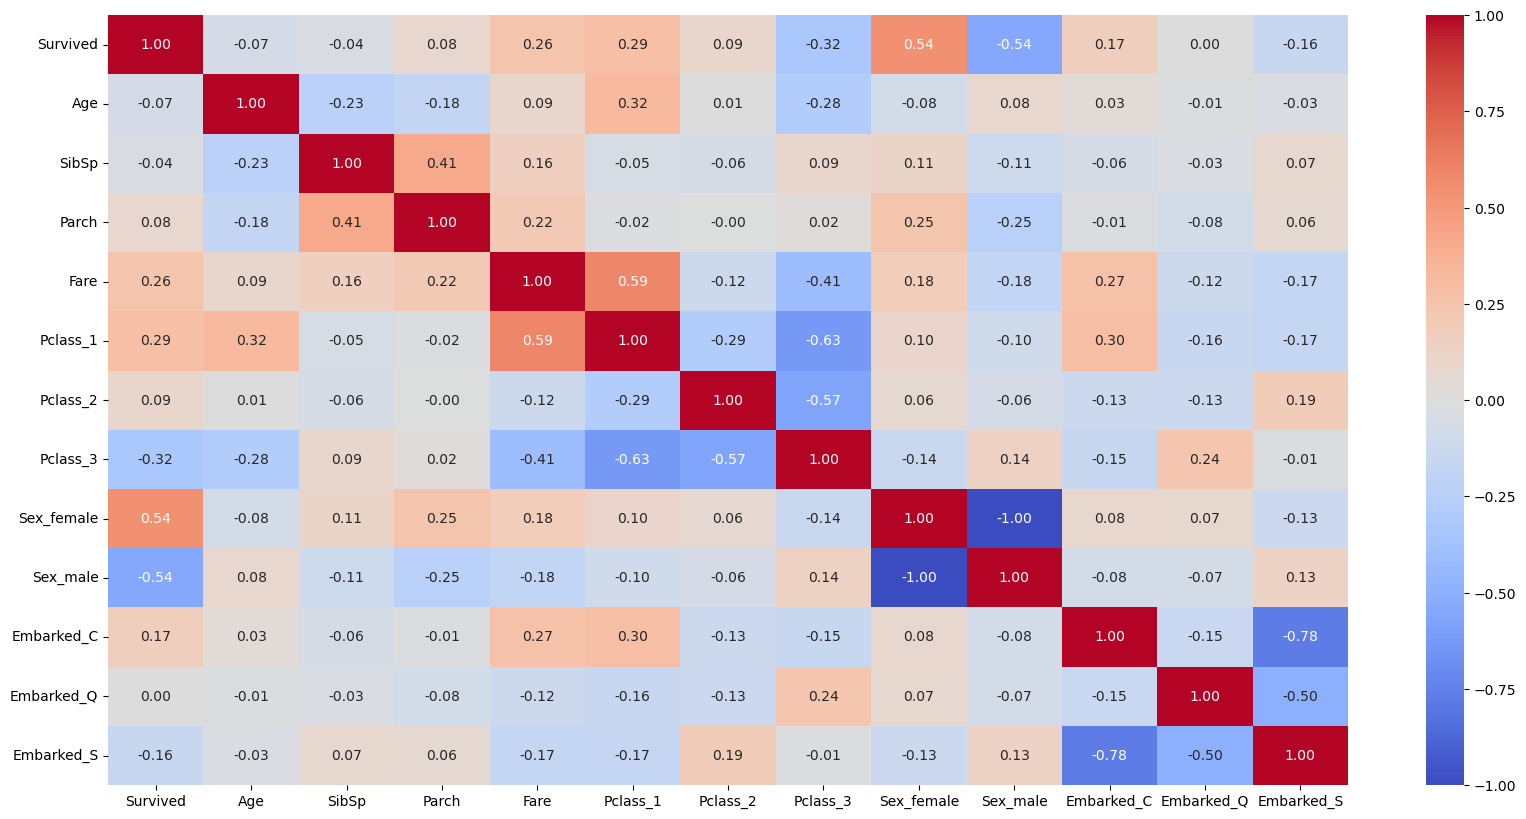

In [372]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', fmt=".2f")

In [373]:
X=df.iloc[:,df.columns != 'Survived'].values
y=df.iloc[:,df.columns == 'Survived'].values

In [374]:
print(X)
print(y)

[[22.          1.          0.         ...  0.          0.
   1.        ]
 [38.          1.          0.         ...  1.          0.
   0.        ]
 [26.          0.          0.         ...  0.          0.
   1.        ]
 ...
 [29.69911765  1.          2.         ...  0.          0.
   1.        ]
 [26.          0.          0.         ...  1.          0.
   0.        ]
 [32.          0.          0.         ...  0.          1.
   0.        ]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 

In [375]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [377]:
print(X_train)

[[17.          0.          0.         ...  1.          0.
   0.        ]
 [28.          1.          0.         ...  1.          0.
   0.        ]
 [29.69911765  0.          0.         ...  0.          0.
   1.        ]
 ...
 [21.          0.          0.         ...  0.          0.
   1.        ]
 [29.69911765  0.          0.         ...  0.          0.
   1.        ]
 [21.          0.          0.         ...  0.          0.
   1.        ]]


In [378]:
print(X_test)

[[48.          0.          0.         ...  0.          0.
   1.        ]
 [29.69911765  0.          0.         ...  0.          0.
   1.        ]
 [17.          0.          0.         ...  0.          0.
   1.        ]
 ...
 [33.          0.          0.         ...  0.          0.
   1.        ]
 [25.          1.          0.         ...  1.          0.
   0.        ]
 [46.          1.          0.         ...  0.          0.
   1.        ]]


In [379]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [380]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [381]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]

In [382]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr) 
  
print("Confusion Matrix:") 
print(cm) 
print("Accuracy:", accuracy) 
print("Precision:", precision) 
print("Recall:", recall) 
print("F1-Score:", f1) 
print("ROC AUC:", roc_auc) 

Confusion Matrix:
[[132  21]
 [ 37  78]]
Accuracy: 0.7835820895522388
Precision: 0.7878787878787878
Recall: 0.6782608695652174
F1-Score: 0.7289719626168224
ROC AUC: 0.7705029838022166


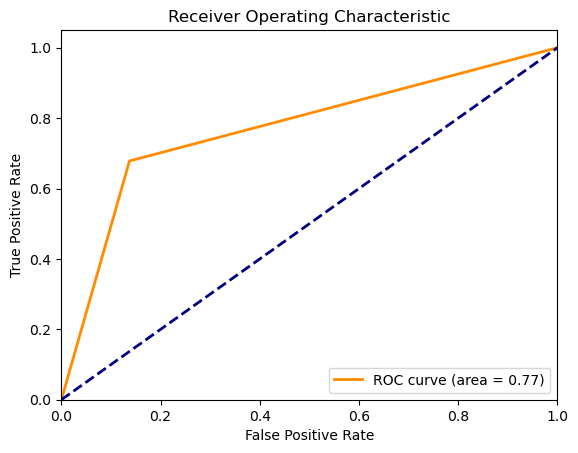

In [383]:
plt.figure() 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic')  
plt.legend(loc='lower right') 
plt.show() 

In [384]:
from sklearn.model_selection import cross_val_score, KFold
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(classifier, X, y, cv=kf)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.84444444 0.76404494 0.82022472 0.76404494 0.80898876 0.87640449
 0.78651685 0.74157303 0.74157303 0.86516854]
Mean CV accuracy: 0.8012983770287143


In [385]:
from lazypredict.Supervised import LazyClassifier  
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=precision_score)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.78               0.77     0.77      0.78   
KNeighborsClassifier               0.78               0.76     0.76      0.78   
BaggingClassifier                  0.78               0.76     0.76      0.78   
CalibratedClassifierCV             0.78               0.76     0.76      0.77   
ExtraTreesClassifier               0.78               0.76     0.76      0.77   
LinearDiscriminantAnalysis         0.77               0.76     0.76      0.77   
AdaBoostClassifier                 0.77               0.76     0.76      0.77   
RidgeClassifierCV                  0.77               0.75     0.75      0.77   
RidgeClassifier                    0.77               0.75     0.75      0.77   
BernoulliNB                        0.76               0.75     0.75      0.76   
RandomForestClassifier      